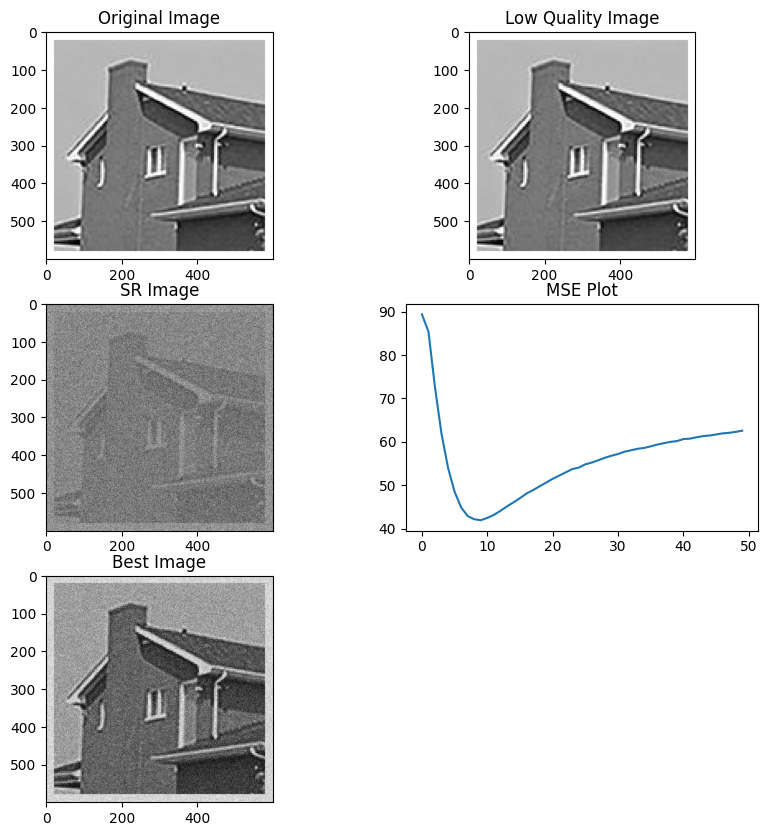

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = "house.jpg"
reference = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Getting the dimensions of the image
M, N = reference.shape

# Low Quality gray scale image
low_quality = 0.01 * reference

# Initialization
threshold = np.sum(low_quality) / (M * N)
SR = np.zeros((M, N))

# Parameters
sigma = 0
num_iterations = 50
mse = np.zeros(num_iterations)

# Main loop
for t in range(num_iterations):
    sigma += 0.1
    
    # Generate noisy images and calculate the sum
    for _ in range(10):
        noisy = sigma * np.random.randn(M, N) + low_quality
        modified = np.zeros_like(noisy)
        for i in range(M):
            for j in range(N):
                if noisy[i,j] > threshold:
                    modified[i,j] = 255
                else:
                    modified[i,j] = 0
        SR += modified
    # Average the sum
    SR /= 10
    
    # Calculate Mean Squared Error (MSE)
    e = reference - SR
    me = e * e
    mse[t] = np.sum(me) / (M * N)
    mse[t] = np.sqrt(mse[t])

    # Update best image
    if t > 0:
        if mse[t - 1] > mse[t]:
            best = SR.copy()

# Display the images
plt.figure(figsize=(10, 10))
plt.subplot(321), plt.imshow(reference, cmap='gray'), plt.title('Original Image')
plt.subplot(322), plt.imshow(low_quality, cmap='gray'), plt.title('Low Quality Image')
plt.subplot(323), plt.imshow(SR, cmap='gray'), plt.title('SR Image')
plt.subplot(324), plt.plot(mse), plt.title('MSE Plot')
plt.subplot(325), plt.imshow(best, cmap='gray'), plt.title('Best Image')
plt.show()